# Stock Market Prediction 

In [58]:
import sys
print (sys.prefix)

c:\users\aakar\appdata\local\programs\python\python36-32


In [59]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("IBM", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,121.970001,119.389999,120.820000,121.680000,4017900.0,120.069717
2020-05-05,124.320000,122.470001,123.389999,122.580002,3899400.0,120.957809
2020-05-06,124.050003,122.410004,123.239998,123.169998,3864600.0,121.540001
2020-05-07,123.260002,120.849998,122.980003,121.230003,4412600.0,121.230003
2020-05-08,123.230003,121.059998,122.669998,122.989998,5002500.0,122.989998


Get the dimension of dataframe

In [60]:
df.shape

(2605, 6)

## Exploring the data 

In [61]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2020-04-27    127.669500
2020-04-28    127.625247
2020-04-29    127.606143
2020-04-30    127.556935
2020-05-01    127.458522
2020-05-04    127.351399
2020-05-05    127.253253
2020-05-06    127.162395
2020-05-07    127.053202
2020-05-08    126.972449
Name: Adj Close, dtype: float64

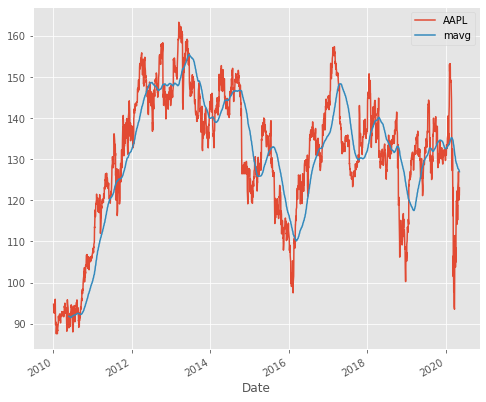

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')

plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [63]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2010-01-04         NaN
2010-01-05   -0.012080
2010-01-06   -0.006496
2010-01-07   -0.003462
2010-01-08    0.010035
Name: Adj Close, dtype: float64

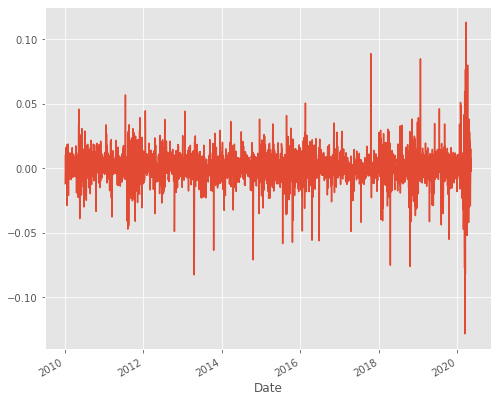

In [64]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation



In [65]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-05-04,292.368561,6.21,1326.800049,120.069717,178.839996
2020-05-05,296.756683,6.20,1351.109985,120.957809,180.759995
2020-05-06,299.818390,5.98,1347.300049,121.540001,182.539993
2020-05-07,302.919983,6.11,1372.560059,121.230003,183.600006
2020-05-08,310.130005,6.29,1388.369995,122.989998,184.679993


Get the dimension of dataframes

In [66]:
dfcomp.shape

(2605, 5)

In [67]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.394877,0.529167,0.463240,0.543654
GE,0.394877,1.000000,0.390035,0.500596,0.432244
GOOG,0.529167,0.390035,1.000000,0.472962,0.601493
IBM,0.463240,0.500596,0.472962,1.000000,0.556587
MSFT,0.543654,0.432244,0.601493,0.556587,1.000000


Text(0, 0.5, 'Returns GE')

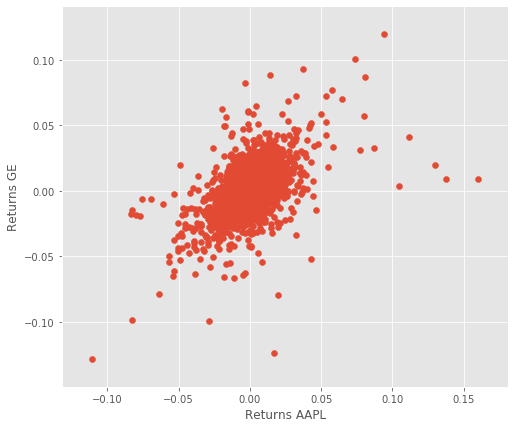

In [68]:
plt.scatter(retscomp.GOOG, retscomp.AAPL)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

Text(0, 0.5, 'Returns GE')

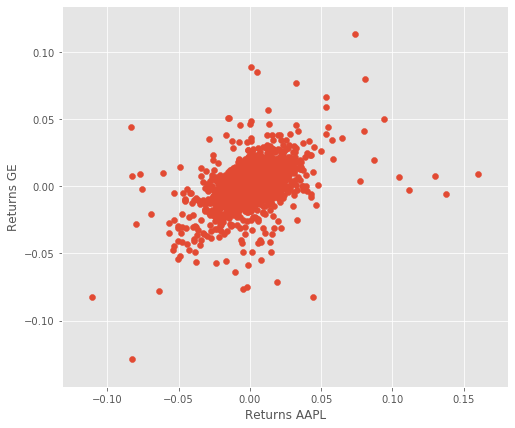

In [69]:
plt.scatter(retscomp.GOOG, retscomp.IBM)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

Text(0, 0.5, 'Returns GE')

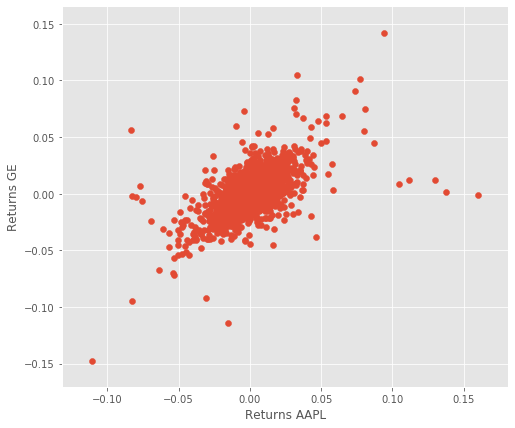

In [70]:
plt.scatter(retscomp.GOOG, retscomp.MSFT)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

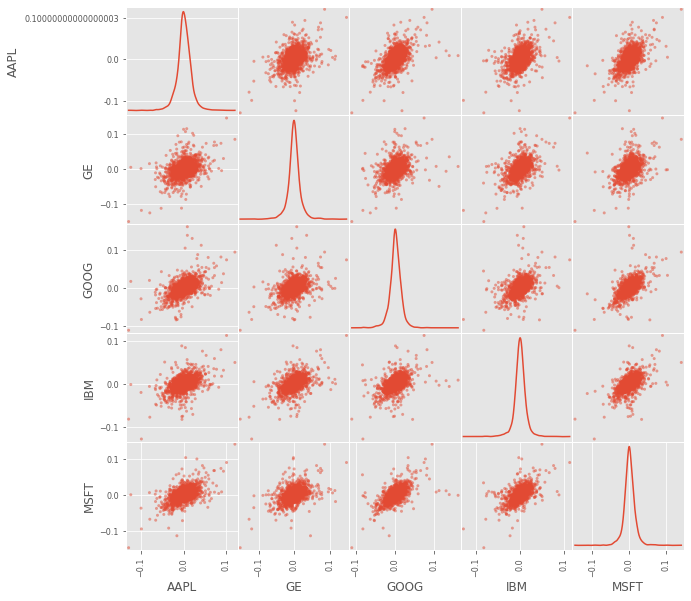

In [71]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

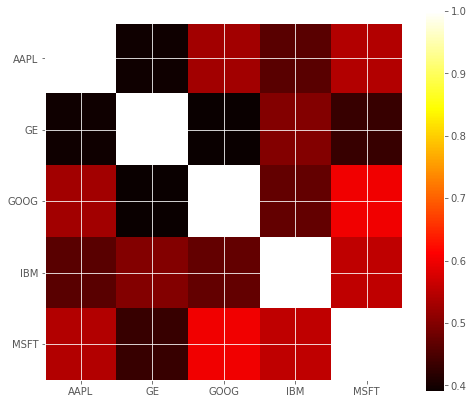

In [72]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

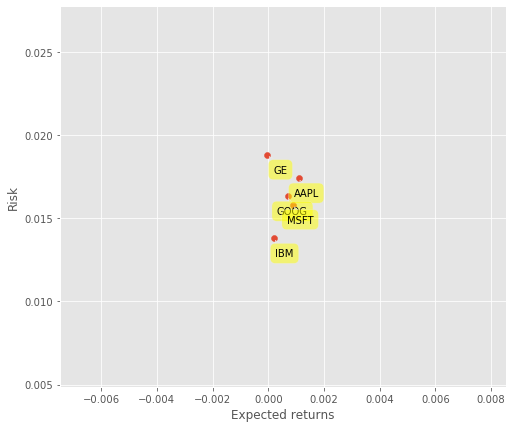

In [73]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

In [74]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,132.970001,130.850006,131.179993,132.449997,6155300.0,94.724556
2010-01-05,131.850006,130.100006,131.679993,130.850006,6841400.0,93.580284
2010-01-06,131.490005,129.809998,130.679993,130.000000,5605300.0,92.972382
2010-01-07,130.250000,128.910004,129.869995,129.550003,5840600.0,92.650536
2010-01-08,130.919998,129.050003,129.070007,130.850006,4197200.0,93.580284


In [75]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,94.724556,6155300.0,1.600600,0.968139
2010-01-05,93.580284,6841400.0,1.337409,-0.630306
2010-01-06,92.972382,5605300.0,1.292314,-0.520349
2010-01-07,92.650536,5840600.0,1.034347,-0.246394
2010-01-08,93.580284,4197200.0,1.429114,1.379096


In [76]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
print(dfreg.head())
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(2605, 4)
            Adj Close     Volume    HL_PCT  PCT_change      label
Date                                                             
2010-01-04  94.724556  6155300.0  1.600600    0.968139  88.884033
2010-01-05  93.580284  6841400.0  1.337409   -0.630306  89.077957
2010-01-06  92.972382  5605300.0  1.292314   -0.520349  89.961578
2010-01-07  92.650536  5840600.0  1.034347   -0.246394  90.751801
2010-01-08  93.580284  4197200.0  1.429114    1.379096  91.814957
Dimension of X (2578, 4)
Dimension of y (2578,)


In [77]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train[0],y_train[0])

[1.08676448 0.64555614 0.54422874 1.52201943] 142.77212524414062


# Model Generation



## Build the model

In [83]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# SVM
model_SVR = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
model_SVR.fit(X_train, y_train)

# Neural Network

#model_NN = MLPRegressor(hidden_layer_sizes = (10,10),alpha=0, max_iter=10000, activation='relu', epsilon=0.001, solver= 'adam')
#model_NN.fit(X_train, y_train)


#model_RF = RandomForestRegressor()
#model_RF.fit(X_train, y_train)



SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Test the model

In [84]:
confidencereg = model_SVR.score(X_test, y_test)

print("The Support Vector regression accuracy is ",confidencereg)


#confidencereg1 = model_NN.score(X_test, y_test)

print("The Neural Network accuracy is ",confidencereg1)

#confidencereg2 = model_RF.score(X_test, y_test)

print("The Random Forest accuracy is ",confidencereg2)

The Support Vector regression accuracy is  0.7250966861792983
The Neural Network accuracy is  0.7498545248652279
The Random Forest accuracy is  0.7667237477766873


In [80]:
# Printing the forecast
forecast_set = model_RF.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[123.55507233 122.61140923 124.44420959 117.87605629 116.37412231
 119.41464661 123.40681625 123.45699028 128.62373695 118.36217896
 117.72576035 121.78032249 117.5673922  118.30492271 120.67408989
 123.46493568 124.65381218 124.66375313 130.08949165 128.33949471
 124.73481308 124.54128471 121.72096153 125.50595512 120.82290146
 130.59806992 129.37380623] 0.5850152799355863 27


# Plotting the Prediction

In [81]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

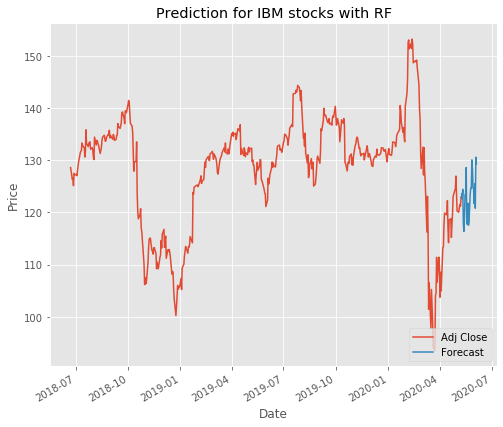

In [82]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Prediction for IBM stocks with RF")
plt.show()